# Example of using VanHoveAnalysis class

/Users/shyue/repos/pymatgen-diffusion/pymatgen/analysis/diffusion/aimd/van_hove.py:233: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(X, Y, grt, cmap="jet", vmin=grt.min(), vmax=vmax)


<module 'matplotlib.pyplot' from '/Users/shyue/opt/miniconda3/envs/pmg/lib/python3.8/site-packages/matplotlib/pyplot.py'>

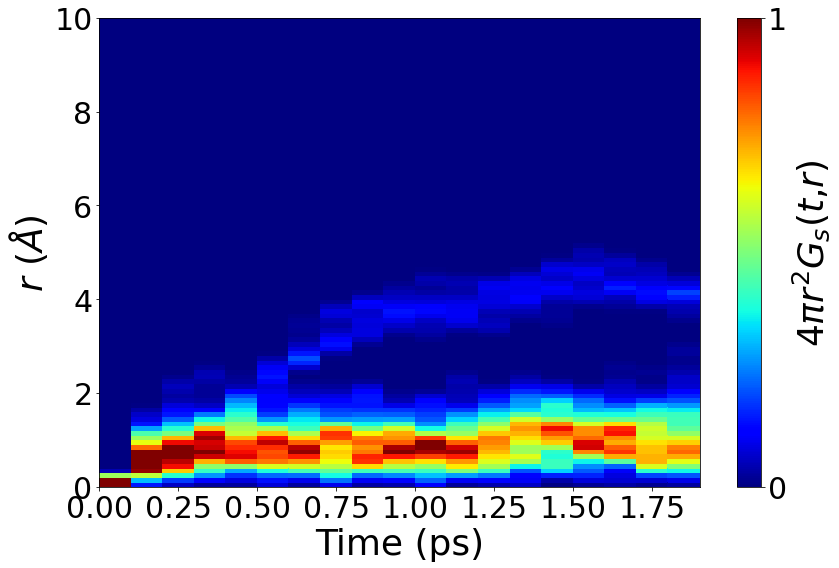

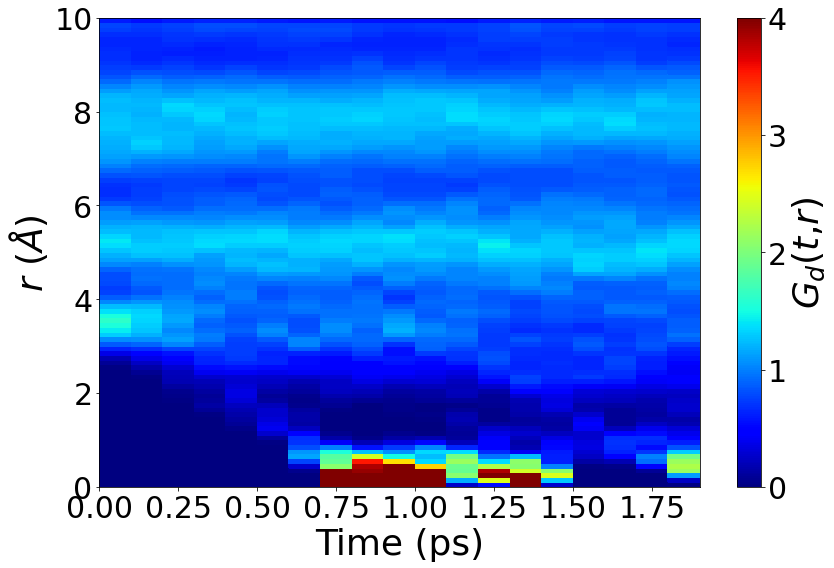

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.analysis.diffusion.analyzer import DiffusionAnalyzer
from pymatgen.analysis.diffusion.aimd.van_hove import VanHoveAnalysis

%matplotlib inline

data = json.load(open("../pymatgen/analysis/diffusion/aimd/tests/cNa3PS4_pda.json", "r"))

new_obj = DiffusionAnalyzer.from_dict(data)

vhfunc = VanHoveAnalysis(diffusion_analyzer=new_obj, avg_nsteps=5, ngrid=101, rmax=10.0, 
                         step_skip=5, sigma=0.1, species = ["Li", "Na"])

vhfunc.get_3d_plot(mode="self")
vhfunc.get_3d_plot(mode="distinct")

<module 'matplotlib.pyplot' from '/Users/shyue/opt/miniconda3/envs/pmg/lib/python3.8/site-packages/matplotlib/pyplot.py'>

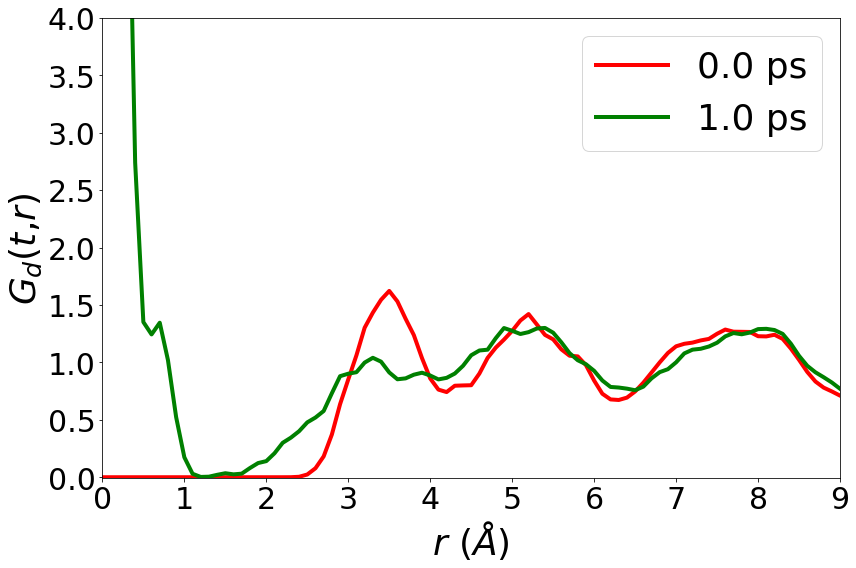

In [ ]:
vhfunc.get_1d_plot(times=[0.0, 1.0], colors=["r", "g"], mode="distinct")

# Example of RadialDistributionFunction class

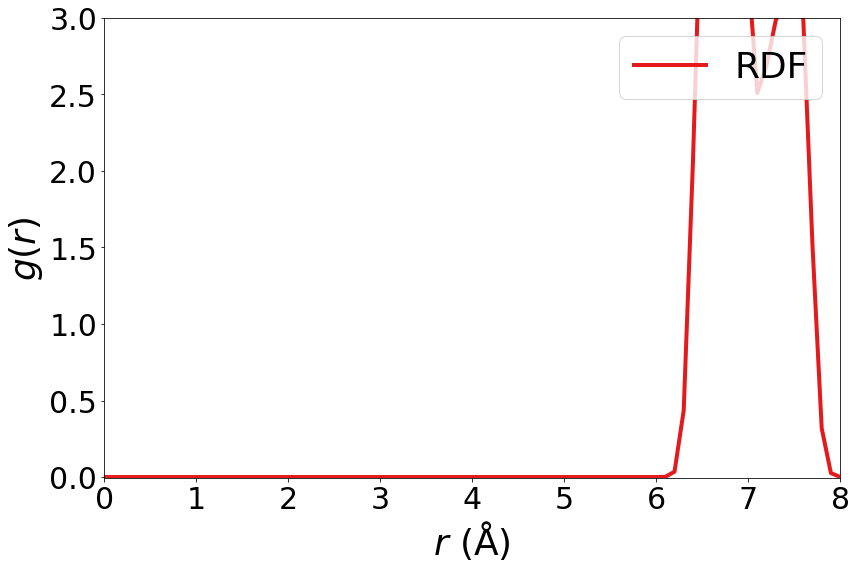

In [ ]:
import json
import numpy as np
from pymatgen.analysis.diffusion.aimd.rdf import RadialDistributionFunction

%matplotlib inline

# The generated structure list in this example is for illustration purposes only.
data = json.load(open("../pymatgen/analysis/diffusion/aimd/tests/cNa3PS4_pda.json", "r"))
new_obj = DiffusionAnalyzer.from_dict(data)

structure_list = []
for i, s in enumerate(new_obj.get_drift_corrected_structures()):
    structure_list.append(s)
    if i == 9: break

# Compute and plot RDF for Na and S        
species = ["Na", "S"]
obj = RadialDistributionFunction(structure_list, ngrid=101, rmax=10.0, sigma=0.1, indices=[0], reference_indices=[2, 3])
plt = obj.get_rdf_plot(label="RDF")